In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/imdb_data.csv')

In [3]:

#Lets check whether the data is load or not. check first 5 rows

In [4]:
df.head(5)

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3348 non-null   object 
 1   primaryTitle    3348 non-null   object 
 2   originalTitle   3348 non-null   object 
 3   isAdult         3348 non-null   int64  
 4   runtimeMinutes  3348 non-null   int64  
 5   genres          3348 non-null   object 
 6   averageRating   3348 non-null   float64
 7   numVotes        3348 non-null   int64  
 8   budget          3348 non-null   int64  
 9   gross           3297 non-null   float64
 10  release_date    3343 non-null   object 
 11  directors       3348 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 314.0+ KB


In [6]:
df.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,51


In [7]:


#lets replace the missing values of gross with KNN imputation

In [8]:
from sklearn.impute import KNNImputer

In [9]:
imputer=KNNImputer(n_neighbors=5)

In [10]:
df[['budget','gross']]=imputer.fit_transform(df[['budget','gross']])

In [11]:
df.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,0


In [12]:


#drop release date rows

In [13]:
df=df.dropna(subset=['release_date'])

In [14]:
df.shape

(3343, 12)

In [15]:
df.columns

Index(['id', 'primaryTitle', 'originalTitle', 'isAdult', 'runtimeMinutes',
       'genres', 'averageRating', 'numVotes', 'budget', 'gross',
       'release_date', 'directors'],
      dtype='object')

In [16]:
df['id'].nunique()

3343

In [17]:

#lets check the overall distribution of movie runtime.

Text(0.5, 1.0, 'distribution of movie runtime.')

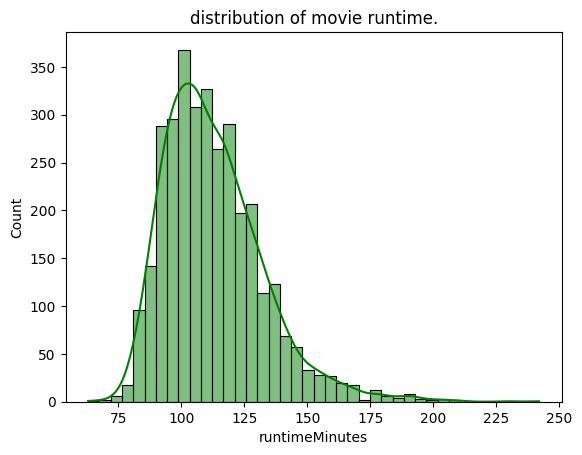

In [18]:
sns.histplot(data=df,x='runtimeMinutes',bins=40,kde=True,color='g')
plt.title('distribution of movie runtime.')

In [19]:

#as we see the distribution. it seems like normal distribution. but lets check for the outliers also


Text(0.5, 1.0, 'boxplot of RunTime movies')

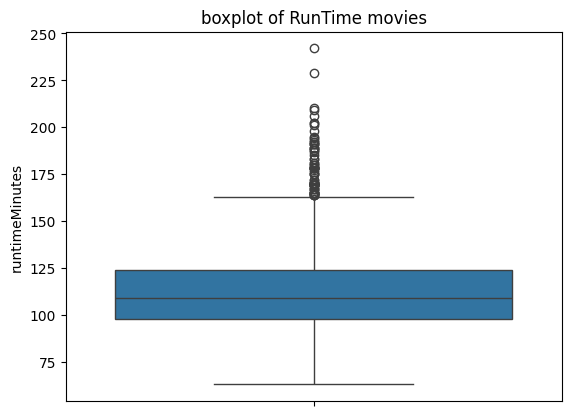

In [20]:
sns.boxplot(df['runtimeMinutes'])
plt.title('boxplot of RunTime movies')

In [21]:

#lets check How many movies are marked as "Adult" (isAdult=1) vs. non-adult (isAdult=0)

In [22]:
df['isAdult'].unique()

array([0])

- as weseen we have only one category in adult section.

- that mean all movies is only for Adult

- so for better analysis we drop the adult column



In [23]:
df.drop(columns=['isAdult'],inplace=True)

In [24]:
df.columns

Index(['id', 'primaryTitle', 'originalTitle', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes', 'budget', 'gross', 'release_date',
       'directors'],
      dtype='object')

In [25]:

#What are the top 10 most common movie genres?

In [26]:
df.head(1)

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold


In [27]:
genres_list=df['genres'].str.split(',').explode()

In [28]:
genres_list

,genres
0,Comedy
0,Fantasy
0,Romance
1,Adventure
1,Animation
...,...
3346,Adventure
3346,Horror
3347,Comedy
3347,Crime


In [29]:
genres_counts=genres_list.value_counts().head(10)

In [30]:
genres_counts

,count
genres,
Drama,1542
Comedy,1176
Action,1171
Adventure,894
Crime,652
Thriller,632
Romance,441
Horror,402
Mystery,376


<ipython-input-31-d2a6b303e093>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_counts.index,y=genres_counts.values,palette='viridis')


Text(0.5, 1.0, 'distribution of movie genres')

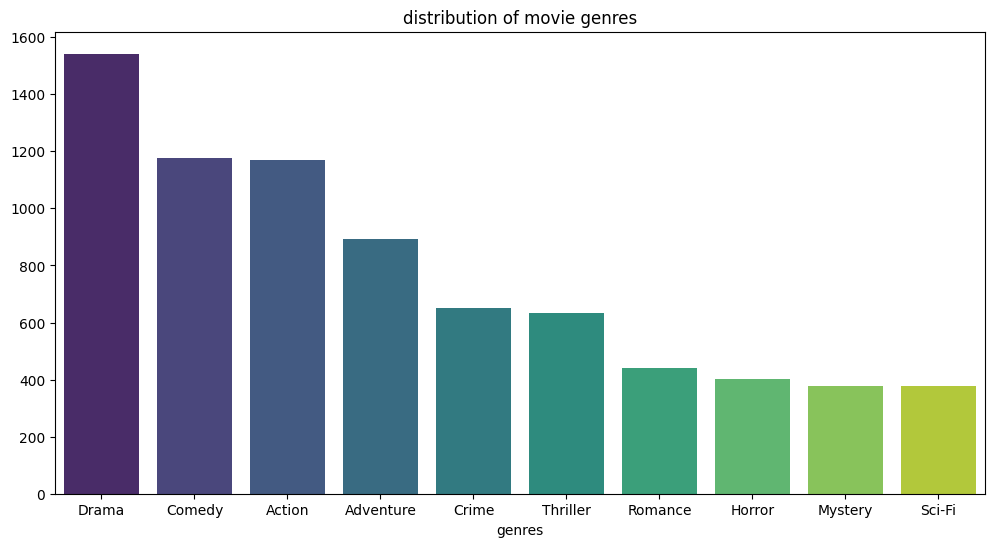

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x=genres_counts.index,y=genres_counts.values,palette='viridis')
plt.title('distribution of movie genres')

-  drama has most dominant genre with 1542 movies
- comedy and action almost equal ~1170
 - adventure , thriller , crime almost equal
 - romance,horror,Mystery and sci-fi are also mid tier genres

In [32]:
#What is the distribution of averageRating? Are ratings skewed toward high or low values?


In [33]:
df.columns

Index(['id', 'primaryTitle', 'originalTitle', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes', 'budget', 'gross', 'release_date',
       'directors'],
      dtype='object')

<Axes: xlabel='averageRating', ylabel='Count'>

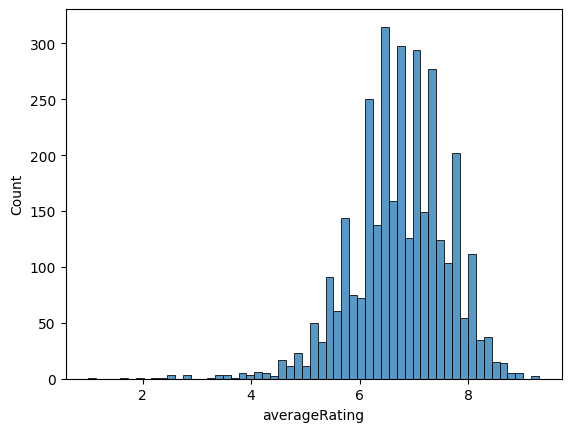

In [34]:
sns.histplot(df['averageRating'])

Text(0.5, 1.0, 'Distribution of Average Rating')

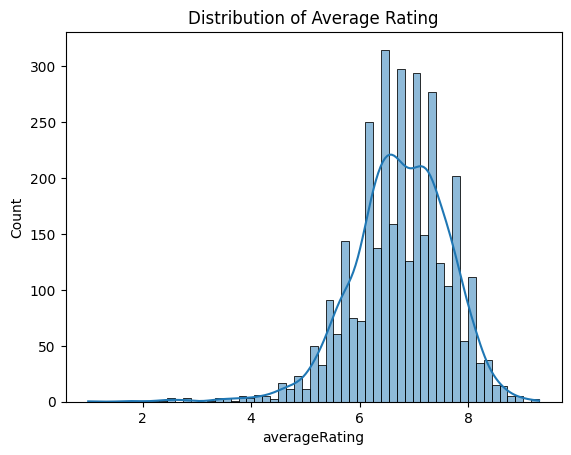

In [35]:
sns.histplot(df['averageRating'],kde=True)
plt.title('Distribution of Average Rating')

In [36]:


#lets see how many movies are very low and very high rated

<Axes: xlabel='averageRating'>

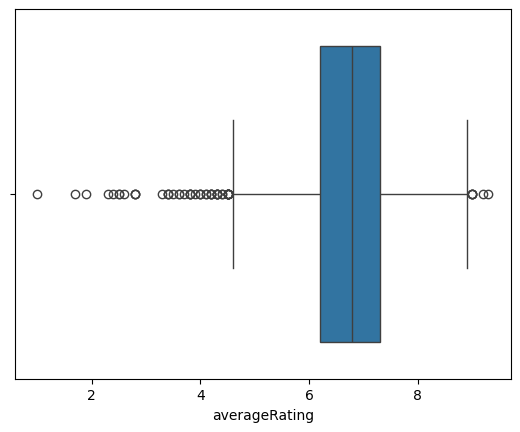

In [37]:
sns.boxplot(x=df['averageRating'])

- Most movies are well rated

-The majority of rating are above 6 to 8 indicating positive bias in user reviews.

-some movies are high rated movies. looks like outliers.

-there are fewer low rated movies, looks outlier, meaning people dontbother to rate them. low rated movies. - prabalely disliked by audiences.

In [38]:

#How many movies have received over 100,000 votes (numVotes > 100,000)?

In [39]:
high_vote_movies=df[df['numVotes']>100000]

In [40]:
high_vote_movies

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
1,tt0065421,The Aristocats,The AristoCats,78,"Adventure,Animation,Comedy",7.1,111758,4000000.0,35459543.0,"December 11, 1970",Wolfgang Reitherman
4,tt0066206,Patton,Patton,172,"Biography,Drama,War",7.9,106476,12000000.0,61749765.0,"February 4, 1970",Franklin J. Schaffner
6,tt0066921,A Clockwork Orange,A Clockwork Orange,136,"Crime,Sci-Fi",8.3,864440,2200000.0,26960374.0,"December 19, 1971",Stanley Kubrick
7,tt0066995,Diamonds Are Forever,Diamonds Are Forever,120,"Action,Adventure,Thriller",6.5,112043,7200000.0,43829933.0,"December 14, 1971",Guy Hamilton
8,tt0066999,Dirty Harry,Dirty Harry,102,"Action,Crime,Thriller",7.7,165277,4000000.0,35988495.0,"December 21, 1971","Don Siegel, Clint Eastwood"
...,...,...,...,...,...,...,...,...,...,...,...
3340,tt9639470,Last Night in Soho,Last Night in Soho,116,"Drama,Horror,Mystery",7.0,165677,43000000.0,22957625.0,"September 4, 2021",Edgar Wright
3342,tt9764362,The Menu,The Menu,107,"Comedy,Horror,Thriller",7.2,359425,35000000.0,79628200.0,"September 10, 2022",Mark Mylod
3343,tt9770150,Nomadland,Nomadland,107,Drama,7.3,175977,5000000.0,39458207.0,"September 11, 2020",Chloé Zhao
3344,tt9777666,The Tomorrow War,The Tomorrow War,138,"Action,Adventure,Drama",6.6,220617,200000000.0,14400000.0,"June 30, 2021",Chris McKay


In [41]:
high_vote_movies.shape

(2099, 11)

Text(0.5, 1.0, 'distribution of movies votes')

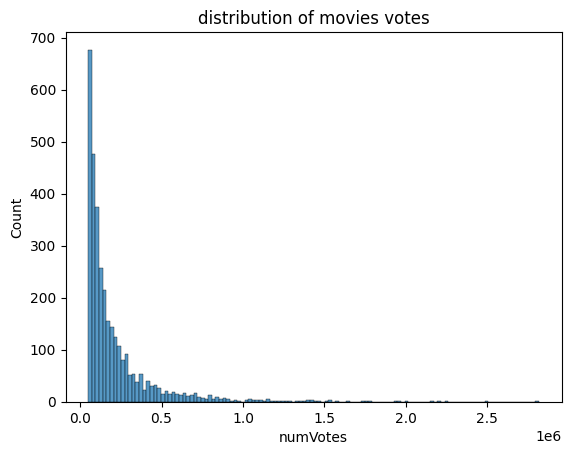

In [42]:
sns.histplot(x=df['numVotes'])
plt.title('distribution of movies votes')